In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('../../data/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Irei definir um vinho como bom se ele tiver a nota maior que 5 

In [88]:
df['is_good_wine'] = np.where(df['quality'] > 5, True, False)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_good_wine
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,False
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,True
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,False
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,True
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,True
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,False


#### Para mostrar a diferença entre o Decision tree e o Random forest não irei mecher no dataset

In [89]:
X = df.drop(['quality', 'is_good_wine'], axis=1)
y = df['is_good_wine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [90]:
params_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],  #A estratégia usada para escolher a divisão em cada nó. 
    'max_depth': range(1, 11),
    'min_samples_split': range(5, 10),
}

In [91]:
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, param_grid=params_dt)

In [92]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11),
                         'min_samples_split': range(5, 10),
                         'splitter': ['best', 'random']})

In [93]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 7,
 'splitter': 'random'}

In [94]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

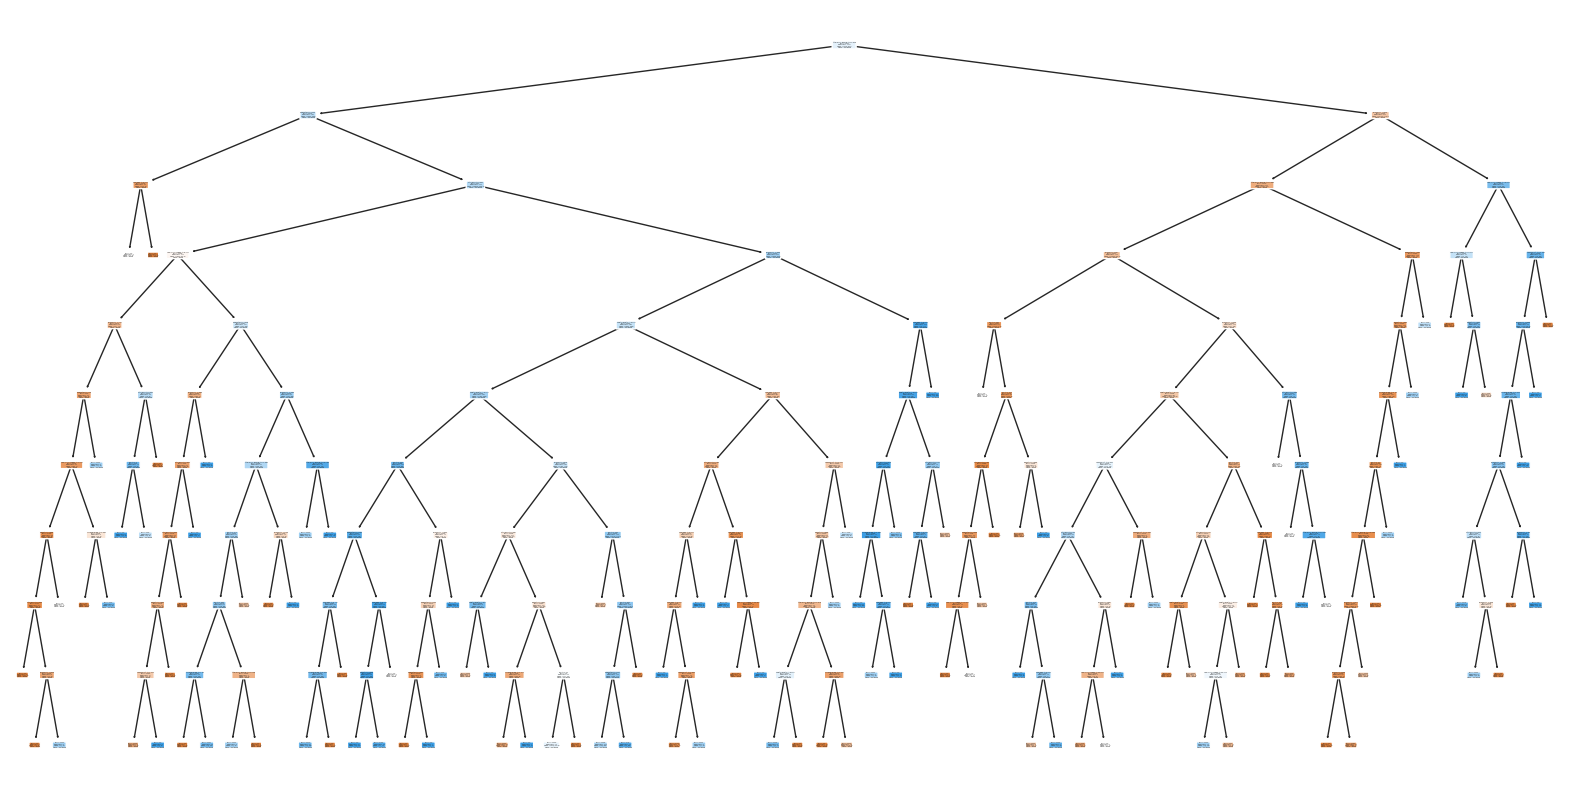

In [95]:
plt.figure(figsize=(20, 10))
plot_tree(clf.best_estimator_, filled=True, feature_names=X_train.columns.tolist(), class_names=['good', 'not good'], rounded=True)
plt.show()

In [96]:
y_predict = clf.predict(X_test)
y_scores = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

In [97]:
print('Classification report:', classification_report(y_test, y_predict))

Classification report:               precision    recall  f1-score   support

       False       0.71      0.56      0.63       226
        True       0.67      0.80      0.73       254

    accuracy                           0.69       480
   macro avg       0.69      0.68      0.68       480
weighted avg       0.69      0.69      0.68       480



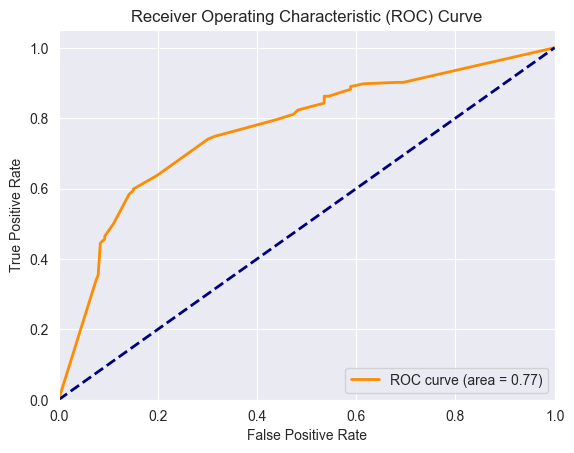

In [98]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()